In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [8]:
case = 'fairfax'
path_origin = './t_stats_strategy3_origin/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_origin_df = pd.read_csv(path_origin)

path_widen2 = './t_stats_widen_Route2/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen2 = pd.read_csv(path_widen2)

path_widen5 = './t_stats_strategy3_widen_Route5/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen5_df = pd.read_csv(path_widen5)

path_widen6 = './t_stats_widen_Route6/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen6 = pd.read_csv(path_widen6)

path_widen7 = './t_stats_widen_Route7/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen7 = pd.read_csv(path_widen7)

path_widen2_5 = './t_stats_widen_Routes2-5/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen2_5 = pd.read_csv(path_widen2_5)

path_widen2_5_6 = './t_stats_widen_Routes2-5-6/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen2_5_6 = pd.read_csv(path_widen2_5_6)

path_widen2_5_7 = './t_stats_widen_Routes2-5-7/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
t_stats_widen2_5_7 = pd.read_csv(path_widen2_5_7)

#path_widen5_6 = './t_stats_strategy3_widen_Routes5-6/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
#t_stats_widen5_6_df = pd.read_csv(path_widen5_6)

#path_widen5_7 = './t_stats_strategy3_widen_Routes5-7/arrivals_fairfax_vect_bg_1_real_departure_time_evacuation.csv'
#t_stats_widen5_7_df = pd.read_csv(path_widen5_7)

In [40]:
t_stats_origin_df_processed = t_stats_origin_df[t_stats_origin_df['t'] % 1000 ==0].copy()
t_stats_widen2_df_processed = t_stats_widen2_df[t_stats_widen2_df['t'] % 1000 ==0].copy()
t_stats_widen5_df_processed = t_stats_widen5_df[t_stats_widen5_df['t'] % 1000 ==0].copy()
t_stats_widen6_df_processed = t_stats_widen6_df[t_stats_widen6_df['t'] % 1000 ==0].copy()
t_stats_widen7_df_processed = t_stats_widen7_df[t_stats_widen7_df['t'] % 1000 ==0].copy()
t_stats_widen2_5_df_processed = t_stats_widen2_5_df[t_stats_widen2_5_df['t'] % 1000 ==0].copy()
t_stats_widen2_5_6_df_processed = t_stats_widen2_5_6_df[t_stats_widen2_5_6_df['t'] % 1000 ==0].copy()
t_stats_widen2_5_7_df_processed = t_stats_widen2_5_7_df[t_stats_widen2_5_7_df['t'] % 1000 ==0].copy()

t_stats_origin_df['arrival_count_before'] = np.append(0,t_stats_origin_df['arrival_count'].values[:-1])
t_stats_widen5_df['arrival_count_before'] = np.append(0,t_stats_widen5_df['arrival_count'].values[:-1])
t_stats_widen5_6_df['arrival_count_before'] = np.append(0,t_stats_widen5_6_df['arrival_count'].values[:-1])
t_stats_widen5_7_df['arrival_count_before'] = np.append(0,t_stats_widen5_7_df['arrival_count'].values[:-1])

In [41]:
t_stats_origin_df['current_count'] = t_stats_origin_df['arrival_count'] - t_stats_origin_df['arrival_count_before']
t_stats_widen5_df['current_count'] = t_stats_widen5_df['arrival_count'] - t_stats_widen5_df['arrival_count_before']
t_stats_widen5_6_df['current_count'] = t_stats_widen5_6_df['arrival_count'] - t_stats_widen5_6_df['arrival_count_before']
t_stats_widen5_7_df['current_count'] = t_stats_widen5_7_df['arrival_count'] - t_stats_widen5_7_df['arrival_count_before']

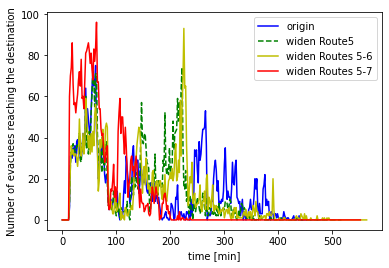

In [42]:
plt.figure()
plt.plot(t_stats_origin_df['t']/60, t_stats_origin_df['current_count'], 'b-', label = 'origin')
plt.plot(t_stats_widen5_df['t']/60, t_stats_widen5_df['current_count'], 'g--', label = 'widen Route5')
plt.plot(t_stats_widen5_6_df['t']/60, t_stats_widen5_6_df['current_count'], 'y-', label = 'widen Routes 5-6')
plt.plot(t_stats_widen5_7_df['t']/60, t_stats_widen5_7_df['current_count'], 'r-', label = 'widen Routes 5-7')
plt.ylabel('Number of evacuees reaching the destination')
plt.xlabel('time [min]')
plt.legend()

In [49]:
#计算每个agent的到达时间
origin_agent_arrival_time_list = np.array([])
widen5_agent_arrival_time_list = np.array([])
widen5_6_agent_arrival_time_list = np.array([])
widen5_7_agent_arrival_time_list = np.array([])

for t_stats in t_stats_origin_df.itertuples():
    current_count = getattr(t_stats, 'current_count')
    time = getattr(t_stats, 't')
    current_arrival_time_array = np.random.randint(time, time+100, size = current_count)
    origin_agent_arrival_time_list = np.concatenate((origin_agent_arrival_time_list, current_arrival_time_array))

for t_stats in t_stats_widen5_df.itertuples():
    current_count = getattr(t_stats, 'current_count')
    time = getattr(t_stats, 't')
    current_arrival_time_array = np.random.randint(time, time+100, size = current_count)
    widen5_agent_arrival_time_list = np.concatenate((widen5_agent_arrival_time_list, current_arrival_time_array))

for t_stats in t_stats_widen5_6_df.itertuples():
    current_count = getattr(t_stats, 'current_count')
    time = getattr(t_stats, 't')
    current_arrival_time_array = np.random.randint(time, time+100, size = current_count)
    widen5_6_agent_arrival_time_list = np.concatenate((widen5_6_agent_arrival_time_list, current_arrival_time_array))

for t_stats in t_stats_widen5_7_df.itertuples():
    current_count = getattr(t_stats, 'current_count')
    time = getattr(t_stats, 't')
    current_arrival_time_array = np.random.randint(time, time+100, size = current_count)
    widen5_7_agent_arrival_time_list = np.concatenate((widen5_7_agent_arrival_time_list, current_arrival_time_array))

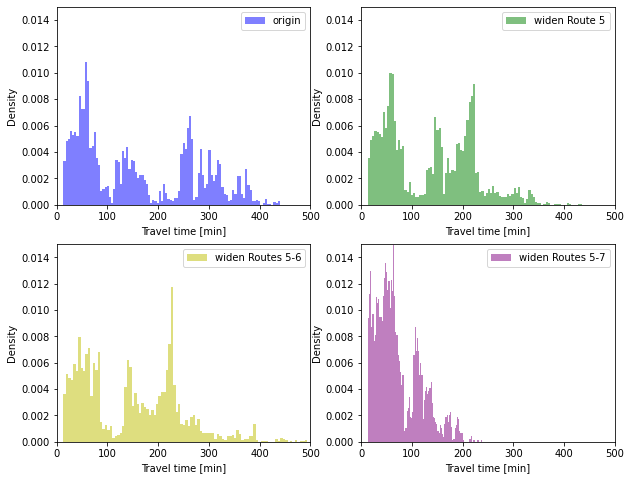

In [82]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(origin_agent_arrival_time_list/60, bins = 100,color = 'b', label = 'origin', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(222)
plt.hist(widen5_agent_arrival_time_list/60, bins = 100,color = 'g', label = 'widen Route 5', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(223)
plt.hist(widen5_6_agent_arrival_time_list/60, bins = 100,color = 'y', label = 'widen Routes 5-6', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(224)
plt.hist(widen5_7_agent_arrival_time_list/60, bins = 100,color = 'purple', label = 'widen Routes 5-7', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.savefig('./density_widen.png', dpi = 800)

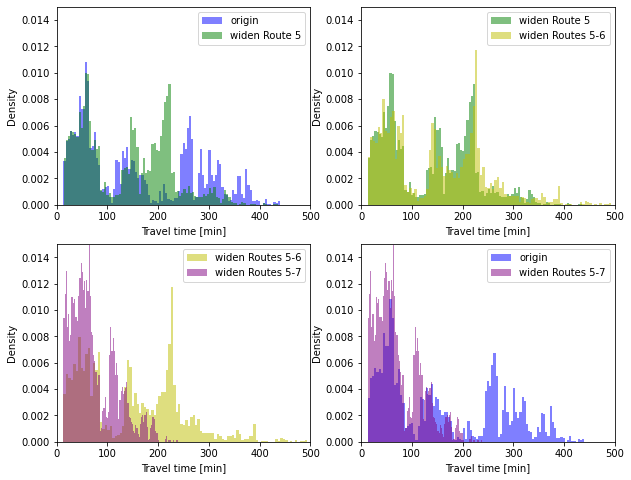

In [83]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(origin_agent_arrival_time_list/60, bins = 100,color = 'b', label = 'origin', density = True, alpha = 0.5)
plt.hist(widen5_agent_arrival_time_list/60, bins = 100,color = 'g', label = 'widen Route 5', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(222)
plt.hist(widen5_agent_arrival_time_list/60, bins = 100,color = 'g', label = 'widen Route 5', density = True, alpha = 0.5)
plt.hist(widen5_6_agent_arrival_time_list/60, bins = 100,color = 'y', label = 'widen Routes 5-6', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(223)
plt.hist(widen5_6_agent_arrival_time_list/60, bins = 100,color = 'y', label = 'widen Routes 5-6', density = True, alpha = 0.5)
plt.hist(widen5_7_agent_arrival_time_list/60, bins = 100,color = 'purple', label = 'widen Routes 5-7', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.subplot(224)
plt.hist(origin_agent_arrival_time_list/60, bins = 100,color = 'b', label = 'origin', density = True, alpha = 0.5)
plt.hist(widen5_7_agent_arrival_time_list/60, bins = 100,color = 'purple', label = 'widen Routes 5-7', density = True, alpha = 0.5)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,0.015)
plt.xlabel('Travel time [min]')
plt.ylabel('Density')
plt.savefig('./density_widen_comparison.png', dpi = 800)

In [6]:
links_in_fairfax_df = pd.read_csv(
    '/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/fairfax/links_in_fairfax.csv')
links_in_fairfax_list = links_in_fairfax_df['link_id'].values.tolist()
links_in_fairfax_list = [str(i) for i in links_in_fairfax_list]
# 逃出fairfax的图
evacuate_fairfax_count_df_widen_Route5 = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 31200,100)):
    path = './agent_stats_strategy3_widen_Route5/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_widen_Route5 = evacuate_fairfax_count_df_widen_Route5.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

 29%|██▉       | 92/312 [00:08<00:19, 11.18it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 312/312 [00:17<00:00, 17.78it/s]


In [8]:
# 逃出fairfax的图
evacuate_fairfax_count_df_widen_Routes5_6 = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 30300,100)):
    path = './agent_stats_strategy3_widen_Routes5-6/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_widen_Routes5_6 = evacuate_fairfax_count_df_widen_Routes5_6.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

 28%|██▊       | 85/303 [00:08<00:17, 12.49it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 303/303 [00:17<00:00, 17.52it/s]


In [66]:
# 逃出fairfax的图
evacuate_fairfax_count_df_widen_Routes5_7 = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 33300,100)):
    path = './agent_stats_strategy3_widen_Routes5-7/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_widen_Routes5_7 = evacuate_fairfax_count_df_widen_Routes5_7.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

 18%|█▊        | 61/333 [00:05<00:26, 10.38it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 26%|██▌       | 85/333 [00:08<00:22, 10.80it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 26%|██▌       | 87/333 [00:08<00:22, 11.12it/s]/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: Dtyp

In [67]:
# 逃出fairfax的图
evacuate_fairfax_count_df_origin = pd.DataFrame(columns = ['time', 'count'])
evacuate_agent_list = np.array([]) #记录跑出去的agent_list
for i in tqdm(range(0, 28900,100)):
    path = './agent_stats_strategy3_origin/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'] >= 120000, ['agent_id','current_link','agent_status']].copy()
    agent_df['current_link'] = agent_df['current_link'].astype('str')
    agent_df['current_link'] = agent_df['current_link'].apply(lambda x: x[:-2] if x[-2:]=='.0' else x)
    agent_df['current_link_fl'] = agent_df['current_link'].apply(lambda x: x[0])
    agent_id_evacuated = agent_df.loc[(~agent_df['current_link'].isin(links_in_fairfax_list)) 
                                      & (agent_df['agent_status']!=0) & (agent_df['current_link_fl']!='v'),'agent_id'].values
    evacuate_agent_list = np.concatenate((evacuate_agent_list, agent_id_evacuated))
    evacuate_agent_list = np.unique(evacuate_agent_list)
    evacuate_fairfax_count_df_origin = evacuate_fairfax_count_df_origin.append([{'time':i,'count':len(evacuate_agent_list)}], ignore_index = True)

100%|██████████| 289/289 [00:18<00:00, 15.55it/s]


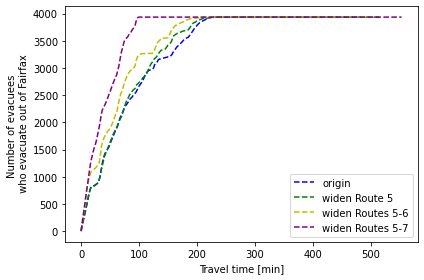

In [84]:
plt.figure()
plt.plot(evacuate_fairfax_count_df_origin['time']/60, evacuate_fairfax_count_df_origin['count'], 'b--', label = 'origin')
plt.plot(evacuate_fairfax_count_df_widen_Route5['time']/60, evacuate_fairfax_count_df_widen_Route5['count'], 'g--', label = 'widen Route 5')
plt.plot(evacuate_fairfax_count_df_widen_Routes5_6['time']/60, evacuate_fairfax_count_df_widen_Routes5_6['count'], 'y--', label = 'widen Routes 5-6')
plt.plot(evacuate_fairfax_count_df_widen_Routes5_7['time']/60, evacuate_fairfax_count_df_widen_Routes5_7['count'], color = 'purple',ls='--', label = 'widen Routes 5-7')
plt.legend()
plt.xlabel('Travel time [min]')
plt.ylabel('Number of evacuees \n who evacuate out of Fairfax')
plt.tight_layout()
plt.savefig('./Number of evacuees who evacuate out of Fairfax.png', dpi = 800)